# git管理 TODO（現在使ってない）

In [49]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.6 MB/s eta 0:00:00


# Flowchart-Detection


In [1]:
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [2]:
# 関連ライブラリのインストール
!pip install cairosvg
!apt install tree
!pip install xmltodict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (54.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
!pwd

/content


In [4]:
!nvidia-smi

Mon Dec  2 16:47:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   33C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# g-driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls /content/drive/MyDrive/programs/flow-chart-detection/

ckpt  data  output


In [7]:
# datasetへのpathを設定
PATH_TO_FCDetection = '/content/drive/MyDrive/programs/flow-chart-detection'

In [8]:
!tree /content/drive/MyDrive/programs/flow-chart-detection

/content/drive/MyDrive/programs/flow-chart-detection
├── ckpt
│   ├── fcos_model.pth
│   └── fd_model.pth
├── data
│   ├── flowchart-example001.webp
│   ├── flowchart-example001.xml
│   ├── flowchart-example002.webp
│   ├── flowchart-example002.xml
│   ├── flowchart-example003.png
│   ├── flowchart-example003.xml
│   ├── flowchart-example004.png
│   ├── flowchart-example004.xml
│   ├── flowchart-example006.png
│   ├── flowchart-example006.xml
│   ├── flowchart-example007.png
│   ├── flowchart-example007.xml
│   ├── flowchart-example008.jpeg
│   ├── flowchart-example008.xml
│   ├── flowchart-example009.jpg
│   ├── flowchart-example009.xml
│   ├── flowchart-example012.png
│   ├── flowchart-example012.xml
│   ├── flowchart-example013.png
│   ├── flowchart-example013.xml
│   ├── flowchart-example014.gif
│   ├── flowchart-example014.xml
│   ├── flowchart-example015.png
│   ├── flowchart-example015.xml
│   ├── flowchart-example016.png
│   ├── flowchart-example016.xml
│   ├── flowchart-exampl

# 画像の読み込みと中身確認

In [9]:
# ライブラリのインストール
from PIL import Image
import cairosvg
from io import BytesIO
import cv2
from IPython.display import display
import numpy as np
import os
import glob

In [ ]:
#画像の読み込み
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
print(f"files: {files}")
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    continue
  if path1.rsplit('.', 1)[1] == 'svg':
    img = cairosvg.svg2png(url=path1)
    img = Image.open(BytesIO(img))
  else:
    img = Image.open(path1)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # img = cv2.imread(path1)
  display(img)

## アノテーションの読み込み

In [ ]:
import xml.etree.ElementTree as ET
for path1 in files:
  if path1.rsplit('.', 1)[1] != 'xml':
    continue
  tree = ET.parse(path1)
  root = tree.getroot()
  for child in root:
    print(child.tag, child.attrib)

## 画像にアノテーションを描画する

In [ ]:
from PIL import ImageDraw
import xmltodict
# xmlのみ収集
xml_files = []
files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', '*'))
for path1 in files:
  if path1.rsplit('.', 1)[1] == 'xml':
    xml_files.append(path1)
print('xml_files', xml_files)

# xmlファイルから対応する画像ファイルを読み込む
for xml_path1 in xml_files:
  # get image path... png, jpg, jpeg, ...etc
  # img_path_base = xml_path1.rsplit('.', 1)[0]
  # files = glob.glob(os.path.join(PATH_TO_FCDetection, 'data', img_path_base + '.*'))
  # img_file_name = None
  # for path1 in files:
  #   if path1.rsplit('.', 1)[1] != 'xml':
  #     img_file_name = path1

  with open(xml_path1, 'r') as f:
      xml_string = f.read()
  xml_dict = xmltodict.parse(xml_string)

  colors = {'terminator':"red",
            'process':"green",
            'decision':"#808080",
            'arrow':"#FFA500",
            'text':"blue",
            'start_point':"#800080",
            'data':"grey",
            'connection':"black",
            'end_point':"yellow"}

  anno_dict = xml_dict['annotation']
  # open image
  filename = anno_dict['filename']
  file_path = os.path.join(PATH_TO_FCDetection, 'data', filename)
  print("file_path, ", file_path)
  # if filename.rsplit('.', 1)[1] == 'gif':
  img = Image.open(file_path).convert('RGB')
  # else:
  #   img = Image.open(file_path)
  print("type(img), ", type(img))
  print("img.size, ", img.size)
  # ImageDrawオブジェクトの作成
  draw = ImageDraw.Draw(img)

  for key, value in anno_dict.items():
    if key == 'object':
      for object1 in value:
        print("object1, ", object1)
        xmin = int(object1['bndbox']['xmin'])
        ymin = int(object1['bndbox']['ymin'])
        xmax = int(object1['bndbox']['xmax'])
        ymax = int(object1['bndbox']['ymax'])

        # 矩形の描画
        # (x1, y1)は左上の座標、(x2, y2)は右下の座標
        print("")
        draw.rectangle((xmin, ymin, xmax, ymax), outline=colors[object1['name']],
                       width=3) # fill=colors[object1['name']],

  # 画像の保存
  # img.save('rectangle.png')
  display(img)



# モデルの構築と学習

## importするtorch関係ライブラリ

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.models.detection import fcos_resnet50_fpn
from torchvision.models.detection.fcos import FCOSHead
import cv2
import numpy as np
from PIL import Image
import xmltodict
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## annotationの前処理

In [15]:
LABELs = {'text':0,
          'arrow':1,
          'connection':2,
          'data':3,
          'decision':4,
          'process':5,
          'terminator':6}

def preprocess_annotation(root_dir=PATH_TO_FCDetection):
  xml_files = glob.glob(os.path.join(root_dir, 'data', '*.xml'))
  print('xml_files', xml_files)
  annotations = []
  for xml_path1 in xml_files:
    with open(xml_path1, 'r') as f:
        xml_string = f.read()
    xml_dict = xmltodict.parse(xml_string)
    anno_dict = xml_dict['annotation']
    boxes = []
    labels = []
    for key, value in anno_dict.items():
      if key == 'object':
        for object1 in value:
          xmin = int(object1['bndbox']['xmin'])
          ymin = int(object1['bndbox']['ymin'])
          xmax = int(object1['bndbox']['xmax'])
          ymax = int(object1['bndbox']['ymax'])
          boxes.append([xmin, ymin, xmax, ymax])
          labels.append(LABELs[object1['name']])
    # img_path = os.path.join(root_dir, 'data', anno_dict['filename'])
    annotations.append({"image": anno_dict['filename'],
                        "boxes": boxes,
                        "labels": labels})
  return annotations

annos = preprocess_annotation()
print(f"len(annos):{len(annos)}")
print(f"annos[0]['filename']:{annos[0]['image']}")
print(f"annos[0]['boxes']:{annos[0]['boxes']}")
print(f"annos[0]['labels']:{annos[0]['labels']}")

xml_files ['/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example001.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example002.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example003.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example004.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example007.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example008.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example009.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example013.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example014.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example015.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example016.xml', '/content/drive/MyDrive/programs/flow-chart

In [18]:
# transform
# def get_transforms():
#     return T.Compose([
#         # TODO data augmentation
#         T.ToTensor(),
#         T.Resize((512, 512)),  # サイズを統一
#         # TODO normalization
#     ])
def get_transforms(phase='train'):
    if phase == 'train':
        return A.Compose([
            A.Resize(512, 512),  # 画像サイズを統一
            A.HorizontalFlip(p=0.5),  # 水平反転
            A.RandomBrightnessContrast(p=0.2),  # 明るさとコントラストの調整
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),  # シフト、スケール、回転
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # 正規化
            ToTensorV2(),  # テンソル変換
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
    else:  # test or validation
        return A.Compose([
            A.Resize(512, 512),  # 画像サイズを統一
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # 正規化
            ToTensorV2(),  # テンソル変換
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

## datasetクラス

In [19]:
# 1. dataset
class CustomObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, image_dir, transforms=None, phase='train'):
        """
        :param annotations: アノテーション情報（リスト形式）[{"image": "path", "boxes": [[x1, y1, x2, y2], ...], "labels": [1, 2, ...]}, ...]
        :param image_dir: 画像ディレクトリパス
        :param transforms: 画像に適用するtorchvision.transforms
        """
        annotations = preprocess_annotation(root_dir)
        if phase == 'train':
            self.annotations = annotations[:int(len(annotations) * 0.85)]
        elif phase == 'test':
            self.annotations = annotations[int(len(annotations) * 0.85):]
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        annotation = self.annotations[idx]
        image_path = f"{self.image_dir}/{annotation['image']}"
        image = Image.open(image_path).convert("RGB")
        image = np.array(image)  # PIL Image を numpy.array に変換
        boxes = annotation["boxes"]
        labels = annotation["labels"]

        # albumentations 形式の変換に適した形に整える
        transformed = self.transforms(
            image=image,
            bboxes=boxes,
            labels=labels
        )
        image = transformed['image']
        boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
        labels = torch.tensor(transformed['labels'], dtype=torch.int64)
        target = {"boxes": boxes, "labels": labels}

        return image, target

image_dir = os.path.join(PATH_TO_FCDetection, 'data')
dataset_train = CustomObjectDetectionDataset(PATH_TO_FCDetection, image_dir, transforms=get_transforms(phase='train'), phase='train')
dataset_test = CustomObjectDetectionDataset(PATH_TO_FCDetection, image_dir, transforms=get_transforms(phase='test'), phase='test')

xml_files ['/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example001.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example002.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example003.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example004.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example007.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example008.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example009.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example013.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example014.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example015.xml', '/content/drive/MyDrive/programs/flow-chart-detection/data/flowchart-example016.xml', '/content/drive/MyDrive/programs/flow-chart

## dataloader
trainとtestの２つ作成

In [20]:
dataloader_train = DataLoader(dataset_train, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
dataloader_test = DataLoader(dataset_test, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

## モデルの定義
faster-rcnn モデル

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

num_classes = len(LABELs)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 3. モデル
model = fasterrcnn_resnet50_fpn(pretrained=True) # fcosモデルを使用
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
# TODO headの部分を変える
model.to(device)

## optimizer, schedulerの定義

In [36]:
# 4. Optimizer と Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

## 1epochの学習

In [37]:
def train_one_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    loss_c, loss_b, loss_o, loss_r = 0,0,0,0
    """
    'loss_classifier', 'loss_box_reg', 'loss_objectness', 'loss_rpn_box_reg'
    """
    # total_pred = []
    # total_target = []
    for images, targets in dataloader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # TODO 出力を要確認
        # print("loss_dict, ", loss_dict)
        # print("type(loss_dict), ", type(loss_dict))

        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
        loss_c += loss_dict['loss_classifier'].item()
        loss_b += loss_dict['loss_box_reg'].item()
        loss_o += loss_dict['loss_objectness'].item()
        loss_r += loss_dict['loss_rpn_box_reg'].item()
        # predicts = outputs['labels']
        # targets = targets['labels
        # total_pred.append(predicts)
        # total_target.append(targets)

    return total_loss / len(dataloader), loss_c / len(dataloader), loss_b / len(dataloader), loss_o / len(dataloader), loss_r / len(dataloader)

## 学習のメイン処理

In [38]:
# 7. メイン処理
num_epochs = 50
loss_dict = {'loss_total':[],
             'loss_classifier':[],
             'loss_boundingbox':[],
             'loss_object':[],
             'loss_rpn':[]}

for epoch in range(num_epochs):
    loss, loss_c, loss_b, loss_o, loss_r = train_one_epoch(model, dataloader_train, optimizer, device)
    loss_dict['loss_total'].append(loss)
    loss_dict['loss_classifier'].append(loss_c)
    loss_dict['loss_boundingbox'].append(loss_b)
    loss_dict['loss_object'].append(loss_o)
    loss_dict['loss_rpn'].append(loss_r)
    lr_scheduler.step()
    # metrics = get_metrics(total_pred, total_target)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
    print(f"loss_classifier: {loss_c:.4f}, loss_boundingbox: {loss_b:.4f}, loss_object: {loss_o:.4f}, loss_rpn: {loss_r:.4f}")

# 8. モデルの保存
torch.save(model.state_dict(), os.path.join(PATH_TO_FCDetection, "ckpt/fcos_model.pth"))



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50, Loss: 2.3957
loss_classifier: 0.6224, loss_boundingbox: 0.4133, loss_object: 0.8046, loss_rpn: 0.5554
Epoch 2/50, Loss: 1.8228
loss_classifier: 0.5606, loss_boundingbox: 0.6579, loss_object: 0.2778, loss_rpn: 0.3264
Epoch 3/50, Loss: 1.5274
loss_classifier: 0.4676, loss_boundingbox: 0.6033, loss_object: 0.1592, loss_rpn: 0.2973
Epoch 4/50, Loss: 1.3439
loss_classifier: 0.4120, loss_boundingbox: 0.5261, loss_object: 0.1526, loss_rpn: 0.2533
Epoch 5/50, Loss: 1.2615
loss_classifier: 0.3838, loss_boundingbox: 0.4781, loss_object: 0.1286, loss_rpn: 0.2710
Epoch 6/50, Loss: 1.1088
loss_classifier: 0.3430, loss_boundingbox: 0.4489, loss_object: 0.0997, loss_rpn: 0.2173
Epoch 7/50, Loss: 1.1391
loss_classifier: 0.3547, loss_boundingbox: 0.4599, loss_object: 0.0877, loss_rpn: 0.2368
Epoch 8/50, Loss: 1.0624
loss_classifier: 0.3283, loss_boundingbox: 0.4362, loss_object: 0.1011, loss_rpn: 0.1968
Epoch 9/50, Loss: 1.1142
loss_classifier: 0.3404, loss_boundingbox: 0.4317, loss_object:

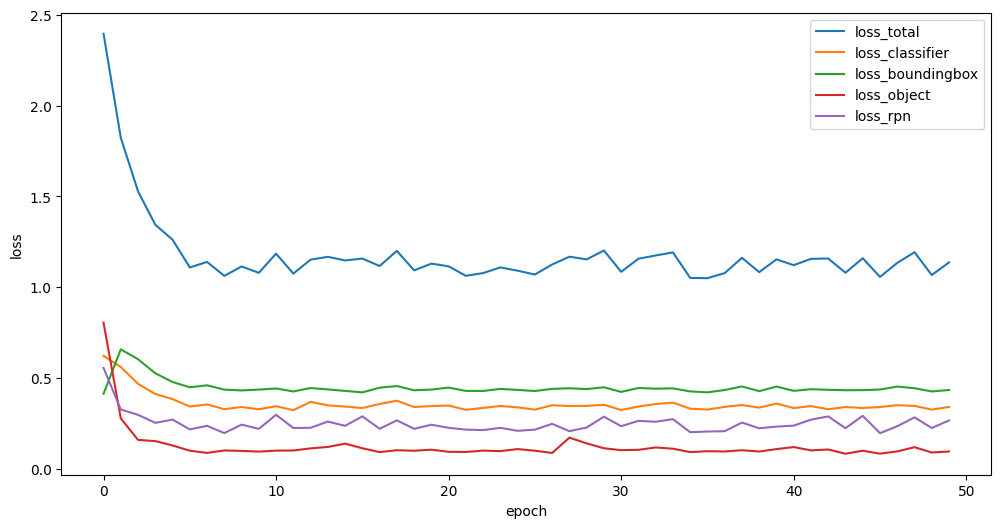

In [39]:
## 学習曲線
import matplotlib.pyplot as plt
import numpy as np

"""
loss_dict = {'loss_total':[],
             'loss_classifier':[],
             'loss_boundingbox':[],
             'loss_object':[],
             'loss_rpn':[]}
"""

# プロット
x = np.arange(len(loss_dict['loss_total']))
plt.figure(figsize=(12, 6))
for key, value in loss_dict.items():
  plt.plot(x, value, label=key)

# 4.5.3 軸名の設定
plt.xlabel('epoch')
plt.ylabel('loss')

# 4.5.4 凡例の表示
plt.legend()

# 4.5.5 プロット表示
plt.show()


## 学習済みモデルを用いた画像の可視化と保存



<ipython-input-40-7a7b2fa7398d>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(PATH_TO_FCDetection, "ckpt/fcos_model.pth"), map_locat

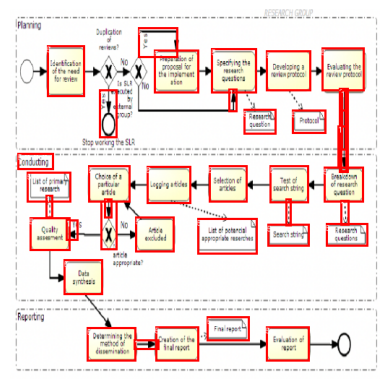

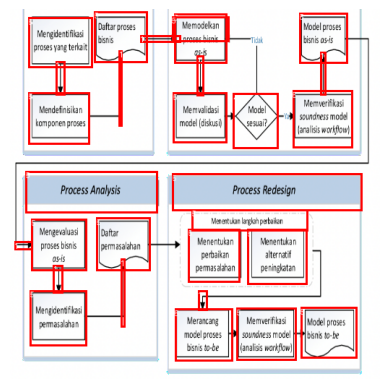

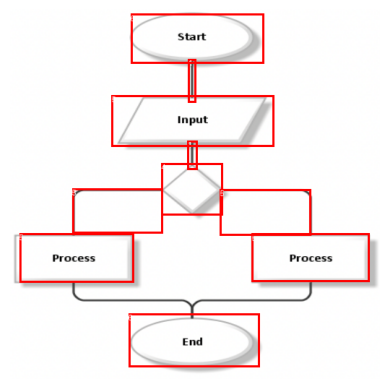

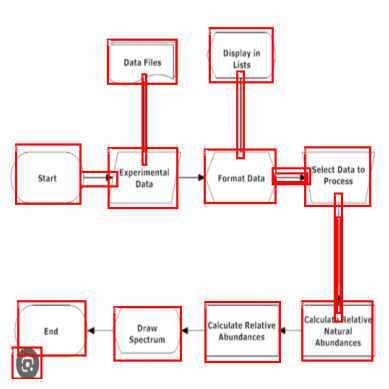

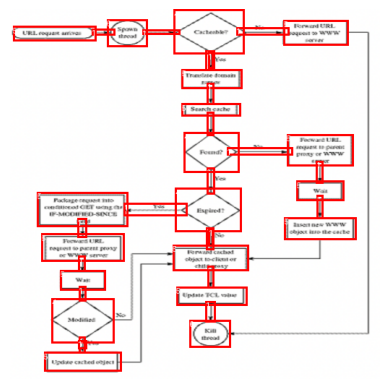

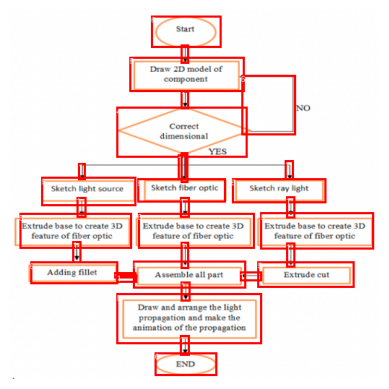

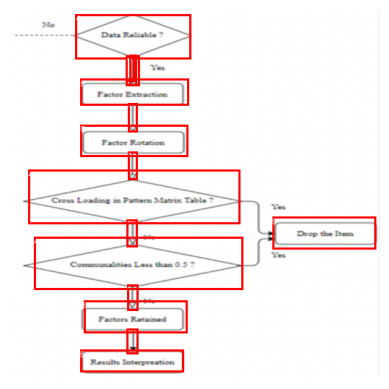

In [40]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

def denormalize(image_tensor, mean, std):
    """
    正規化を解除する関数。
    :param image_tensor: 正規化された画像テンソル (C, H, W)
    :param mean: 正規化時に使用した平均
    :param std: 正規化時に使用した標準偏差
    :return: 正規化解除後のテンソル (C, H, W)
    """
    mean = torch.tensor(mean).view(3, 1, 1)  # (C, H, W) に対応する形状に調整
    std = torch.tensor(std).view(3, 1, 1)
    return image_tensor * std + mean  # 元のスケールに戻す

# デバイスの設定（GPU が利用可能なら GPU を使用、そうでなければ CPU を使用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 学習済みモデルのロード
model = fasterrcnn_resnet50_fpn(num_classes=7)
state_dict = torch.load(os.path.join(PATH_TO_FCDetection, "ckpt/fcos_model.pth"), map_location=device)
model.load_state_dict(state_dict)
# model = torch.load(os.path.join(PATH_TO_FCDetection, "ckpt/fcos_model.pth"))  # 学習済みモデルのパス
model = model.to(device)  # モデルをデバイスに移動
model.eval()  # 推論モードに切り替え

# 正規化時に使用した平均と標準偏差
mean = [0.485, 0.456, 0.406]  # 通常の ImageNet の平均
std = [0.229, 0.224, 0.225]   # 通常の ImageNet の標準偏差

# テスト用データセットのサンプルを取得
# test_sample = dataset_test[0]  # 例として1つ目のサンプル
for images, targets in dataloader_test:
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    # 推論
    with torch.no_grad():
        outputs = model(images)

    # 出力を取得
    for output, image in zip(outputs, images):
        pred_boxes = output['boxes'].cpu()  # 推論されたバウンディングボックス
        pred_scores = output['scores'].cpu()  # 推論されたスコア
        pred_labels = output['labels'].cpu()  # 推論されたラベル
        image = image.cpu()


        # 元の画像を取得し、正規化を解除
        image = denormalize(image, mean, std)  # image はテンソル (C, H, W)
        # output = outputs[0]
        # pred_boxes = output['boxes'].cpu()  # 推論されたバウンディングボックス
        # pred_scores = output['scores'].cpu()  # 推論されたスコア
        # pred_labels = output['labels'].cpu()  # 推論されたラベル

        # スコア閾値でフィルタリング（必要に応じて調整）
        threshold = 0.5
        filtered_boxes = pred_boxes[pred_scores > threshold].tolist()
        filtered_labels = pred_labels[pred_scores > threshold].tolist()

        # 元の画像を取得して描画
        image_pil = Image.fromarray((image.permute(1, 2, 0).numpy() * 255).astype('uint8'))  # [C, H, W] -> [H, W, C]
        draw = ImageDraw.Draw(image_pil)

        # フォントを設定（オプション）
        try:
            font = ImageFont.truetype("arial.ttf", size=16)
        except IOError:
            font = ImageFont.load_default()

        # バウンディングボックスとラベルを描画
        for box, label in zip(filtered_boxes, filtered_labels):
            x_min, y_min, x_max, y_max = box
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
            draw.text((x_min, y_min), str(label), fill="white", font=font)

        # 結果を表示
        plt.imshow(image_pil)
        plt.axis('off')
        plt.show()
